In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [79]:
df= pd.read_csv('train_1.csv')

In [80]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1,Urban,Y


<Axes: xlabel='Gender', ylabel='LoanAmount'>

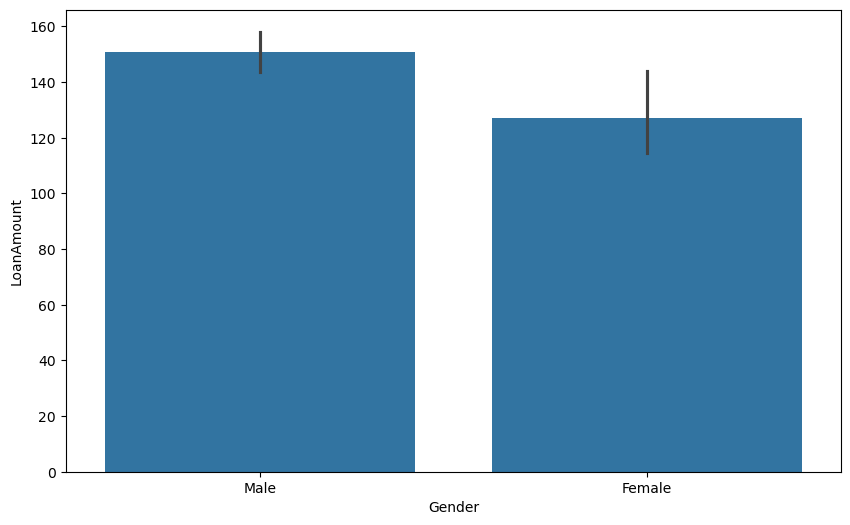

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender',y='LoanAmount',data=df)

<Axes: xlabel='Loan_Status', ylabel='count'>

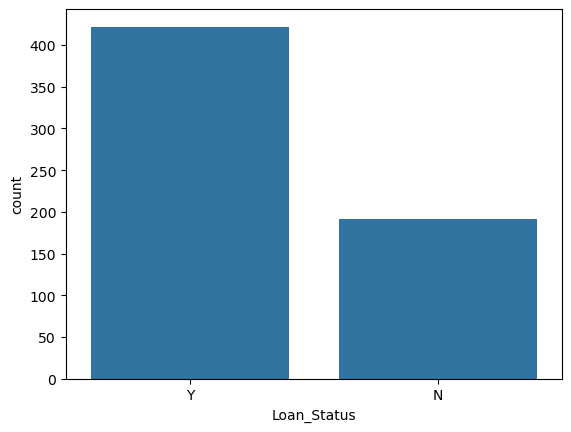

In [82]:
sns.countplot(x='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

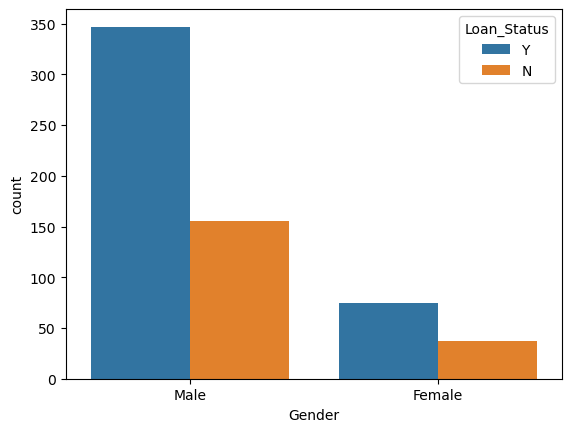

In [83]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Education', ylabel='count'>

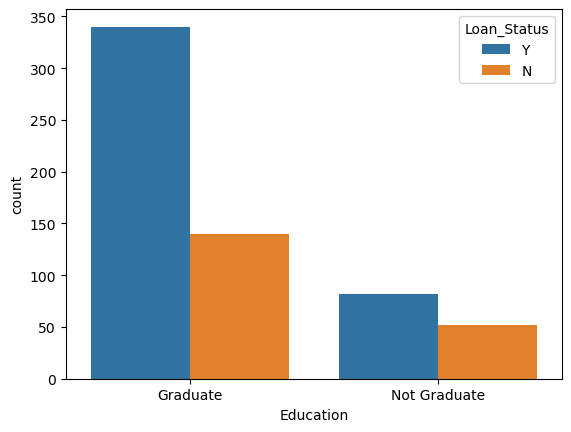

In [84]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

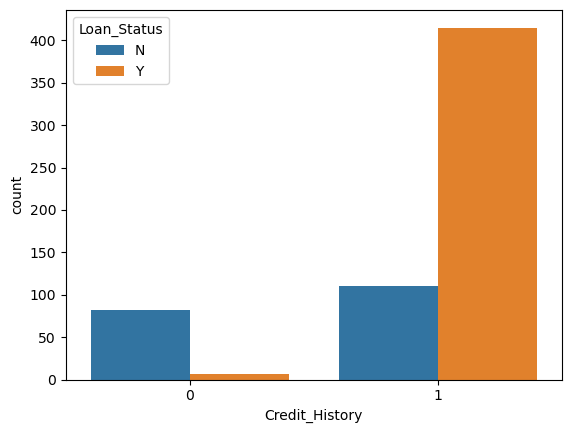

In [85]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

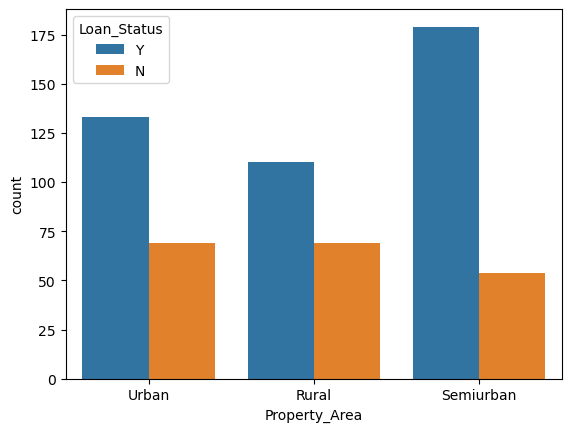

In [86]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

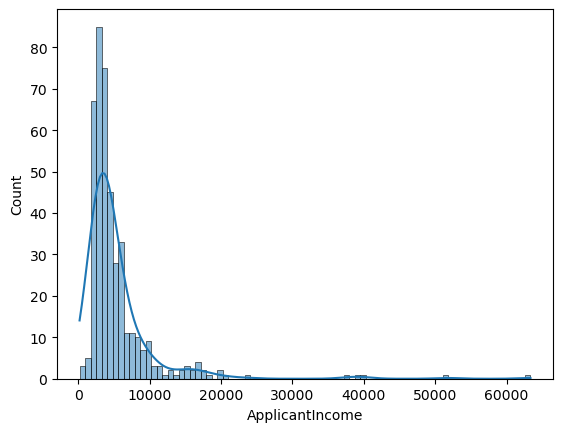

In [87]:
sns.histplot(df[df['Loan_Status']=='Y']['ApplicantIncome'], kde=True)


Text(0.5, 1.0, 'LoanAmount by Education')

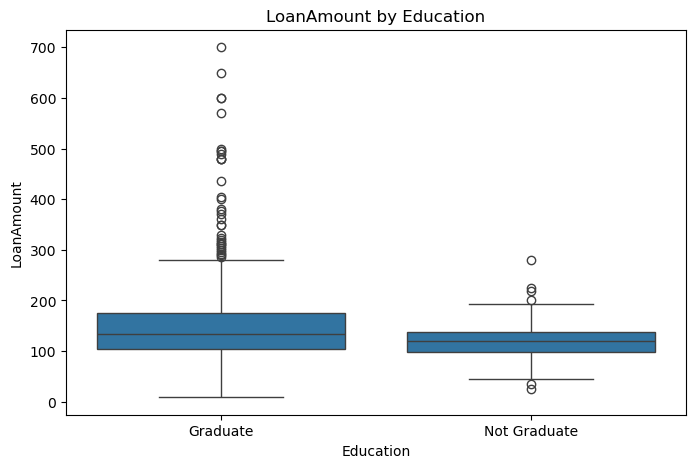

In [88]:
plt.figure(figsize=(8,5))
sns.boxplot(y='LoanAmount', x='Education', data=df)
plt.title("LoanAmount by Education")


Text(0.5, 1.0, 'LoanAmount by Property_Area')

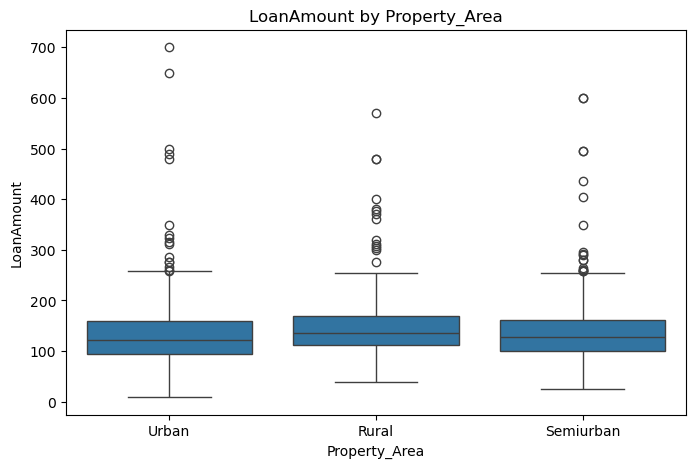

In [89]:
plt.figure(figsize=(8,5))
sns.boxplot(y='LoanAmount', x='Property_Area', data=df)
plt.title("LoanAmount by Property_Area")


In [91]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

Text(0.5, 1.0, 'LoanAmount by Property_Area')

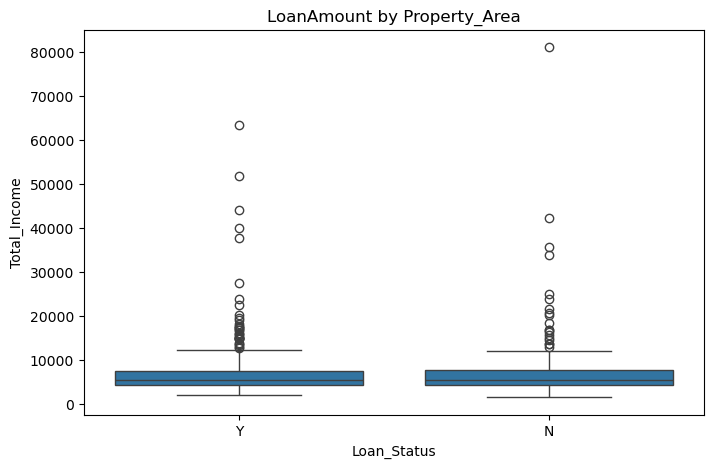

In [92]:
plt.figure(figsize=(8,5))
sns.boxplot(y='Total_Income', x='Loan_Status', data=df)
plt.title("LoanAmount by Property_Area")


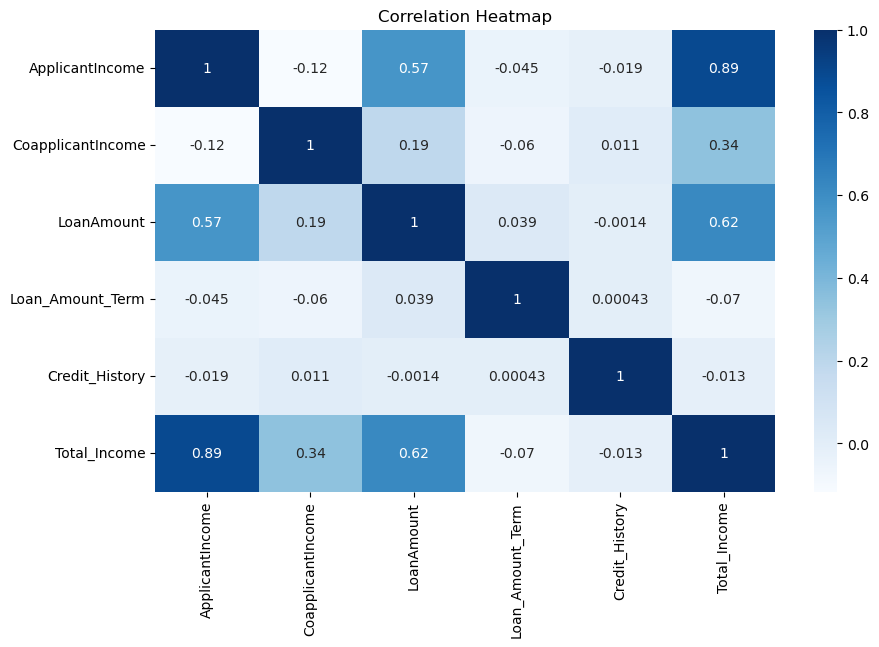

In [93]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [94]:
#Log Transformation of LoanAmount (to reduce skewness)
df['LoanAmount_log'] = np.log(df["LoanAmount"].replace(0,np.nan).fillna(df["LoanAmount"].median()))

df['Total_Income_log'] = np.log(df["Total_Income"])

In [95]:
#function for creating income categories 
def income_category(income):
    if income<2500:
        return 'Low'
    elif 2500<=income<4000:
        return 'Mid'
    elif 4000<=income<6000:
        return 'High'
    else:
        return 'Very High'

df['Income_category'] = df['Total_Income'].apply(income_category)

In [127]:
df.head(10)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,LoanAmount_log,Total_Income_log,Property_Area_Semiurban,Property_Area_Urban,Income_category_Low,Income_category_Mid,Income_category_Very High,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,0,0,5849,0.0,146.412162,360,1,...,4.986426,8.674026,False,True,False,False,False,False,False,False
1,LP001003,1,1,0,0,4583,1508.0,128.000000,360,1,...,4.852030,8.714568,False,False,False,False,True,True,False,False
2,LP001005,1,1,0,1,3000,0.0,66.000000,360,1,...,4.189655,8.006368,False,True,False,True,False,False,False,False
3,LP001006,1,1,1,0,2583,2358.0,120.000000,360,1,...,4.787492,8.505323,False,True,False,False,False,False,False,False
4,LP001008,1,0,0,0,6000,0.0,141.000000,360,1,...,4.948760,8.699515,False,True,False,False,True,False,False,False
5,LP001011,1,1,0,1,5417,4196.0,267.000000,360,1,...,5.587249,9.170872,False,True,False,False,True,False,True,False
6,LP001013,1,1,1,0,2333,1516.0,95.000000,360,1,...,4.553877,8.255569,False,True,False,True,False,False,False,False
7,LP001014,1,1,0,0,3036,2504.0,158.000000,360,0,...,5.062595,8.619750,True,False,False,False,False,False,False,True
8,LP001018,1,1,0,0,4006,1526.0,168.000000,360,1,...,5.123964,8.618305,False,True,False,False,False,False,True,False
9,LP001020,1,1,0,0,12841,10968.0,349.000000,360,1,...,5.855072,10.077819,True,False,False,False,True,True,False,False


In [117]:
cols_to_encode = ['Gender','Married','Education','Self_Employed']
le = LabelEncoder()
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col].astype(str))

In [125]:
df = pd.get_dummies(df,columns=['Property_Area','Income_category','Dependents'],drop_first=True)

In [129]:
df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1})

In [135]:
df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1,inplace=True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     614 non-null    int32  
 1   Married                    614 non-null    int32  
 2   Education                  614 non-null    int32  
 3   Self_Employed              614 non-null    int32  
 4   Loan_Amount_Term           614 non-null    int64  
 5   Credit_History             614 non-null    int64  
 6   Loan_Status                614 non-null    int64  
 7   Total_Income               614 non-null    float64
 8   LoanAmount_log             614 non-null    float64
 9   Total_Income_log           614 non-null    float64
 10  Property_Area_Semiurban    614 non-null    bool   
 11  Property_Area_Urban        614 non-null    bool   
 12  Income_category_Low        614 non-null    bool   
 13  Income_category_Mid        614 non-null    bool   

In [139]:
df.to_csv('After_feature_engg.csv')